### **EDA: PARAMOUNT PLUS**
#### En este EDA vamos analizar el dataset de las películas y series de Paramount, profundizando en sus ratings, tipo de producción, edades, géneros, duración, popularidad, críticas, años de lanzamiento...

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import folium
from folium.plugins import HeatMap, TimestampedGeoJson
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import re

df_paramount = pd.read_csv("titles.csv")
series = df_paramount[df_paramount['type'] == "SHOW"]
peliculas = df_paramount[df_paramount['type'] == "MOVIE"]


### Inspección de los datos

In [150]:
df_paramount.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
1,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
2,tm19424,Detour,MOVIE,"The life of Al Roberts, a pianist in a New Yor...",1945,NaN,66,"['thriller', 'drama', 'crime']",['US'],NaN,tt0037638,7.3,17233.0,7.757,7.2
3,tm112005,Marihuana,MOVIE,A young girl named Burma attends a beach party...,1936,NaN,57,"['crime', 'drama']",['US'],NaN,tt0026683,4.0,864.0,3.748,3.6
4,tm22806,Intolerance: Love's Struggle Throughout the Ages,MOVIE,"The story of a poor young woman, separated by ...",1916,NaN,197,"['history', 'drama']",['US'],NaN,tt0006864,7.7,15242.0,9.412,7.2


In [151]:
df_paramount.shape

(2825, 15)

In [152]:
df_paramount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2825 entries, 0 to 2824
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2825 non-null   object 
 1   title                 2825 non-null   object 
 2   type                  2825 non-null   object 
 3   description           2812 non-null   object 
 4   release_year          2825 non-null   int64  
 5   age_certification     1302 non-null   object 
 6   runtime               2825 non-null   int64  
 7   genres                2825 non-null   object 
 8   production_countries  2825 non-null   object 
 9   seasons               626 non-null    float64
 10  imdb_id               2666 non-null   object 
 11  imdb_score            2613 non-null   float64
 12  imdb_votes            2613 non-null   float64
 13  tmdb_popularity       2768 non-null   float64
 14  tmdb_score            2337 non-null   float64
dtypes: float64(5), int64(

In [153]:
df_paramount.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,2825.000000,2825.000000,626.000000,2613.000000,2.613000e+03,2768.000000,2337.000000
mean,1990.700177,72.254867,3.980831,6.042863,2.223876e+04,13.043838,6.045528
std,31.391022,30.068739,5.411657,1.275331,1.158232e+05,96.294178,1.484901
min,1912.000000,1.000000,1.000000,1.700000,5.000000e+00,0.009442,1.000000
25%,1965.000000,48.000000,1.000000,5.300000,1.480000e+02,1.266750,5.100000
50%,2007.000000,75.000000,2.000000,6.100000,5.480000e+02,2.620500,6.100000
75%,2017.000000,93.000000,4.000000,7.000000,3.092000e+03,6.957250,7.000000
max,2022.000000,228.000000,49.000000,9.400000,1.994599e+06,4579.160000,10.000000


In [154]:
df_paramount.describe(include='object')

,id,title,type,description,age_certification,genres,production_countries,imdb_id
count,2825,2825,2825,2812,1302,2825,2825,2666
unique,2825,2810,2,2810,11,858,138,2666
top,tm1032011,The Odd Couple,MOVIE,No overview found.,R,['documentation'],['US'],tt15392066
freq,1,3,2199,3,321,290,2183,1


### Valores Más Frecuentes

In [155]:
def valores_frecuentes(data):
  total = data.count()
  tt = pd.DataFrame(total)
  tt.columns = ['Total']
  items = []
  vals = []
  for col in data.columns:
    item = data[col].value_counts().index[0]
    val = data[col].value_counts().values[0]
    items.append(item)
    vals.append(val)

  tt['Valores más frecuentes'] = items
  tt['Frecuencia'] = vals
  tt['Porcentaje'] = np.round(vals/total*100, 3)
  return np.transpose(tt)

valores_frecuentes(df_paramount)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
Total,2825,2825,2825,2812,2825,1302,2825,2825,2825,626,2666,2613,2613,2768,2337
Valores más frecuentes,tm1032011,The Odd Couple,MOVIE,No overview found.,2017,R,90,['documentation'],['US'],1.0,tt15392066,5.6,10.0,0.6,6.0
Frecuencia,1,3,2199,3,189,321,114,290,2183,225,1,94,15,269,126
Porcentaje,0.035,0.106,77.841,0.107,6.69,24.654,4.035,10.265,77.274,35.942,0.038,3.597,0.574,9.718,5.392


In [156]:
valores_frecuentes(series)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
Total,626,626,626,618,626,561,626,626,626,626,600,574,574,598,460
Valores más frecuentes,ts291097,Rugrats,SHOW,The talk show legend travels across the countr...,2015,TV-14,22,['documentation'],['US'],1.0,tt14315936,8.0,15.0,0.6,8.0
Frecuencia,1,2,626,1,55,165,62,104,487,225,1,22,7,78,33
Porcentaje,0.16,0.319,100.0,0.162,8.786,29.412,9.904,16.613,77.796,35.942,0.167,3.833,1.22,13.043,7.174


### Valores únicos

In [157]:
def valores_unicos(data):
  total = data.count()
  tt = pd.DataFrame(total)
  tt.columns = ['Total']
  unicos = []
  for col in data.columns:
    unicos.append(data[col].nunique())
  tt['Valores únicos'] = unicos
  return np.transpose(tt)

valores_unicos(df_paramount)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
Total,2825,2825,2825,2812,2825,1302,2825,2825,2825,626,2666,2613,2613,2768,2337
Valores únicos,2825,2810,2,2810,110,11,156,858,138,30,2666,76,1627,2110,79


### Calidad de los datos
Contamos con unos datos con buena calidad ya que no hay ninguna fila duplicada y en cuanto a datos faltantes, podemos apreciar alguna descripción aunque con números insignificativos o las certificaciones de edad en producciones más antiguas. También apreciamos algunas faltas de datos en las puntuaciones de imdb pero en referencia al volumen de datos del dataset es insignificativo.

In [158]:
# Contar el número de filas duplicadas
num_duplicates = df_paramount.duplicated().sum()
print(f"Número de filas duplicadas: {num_duplicates}")

Número de filas duplicadas: 0


In [159]:
# Encontrar filas duplicadas
filas_duplicadas = df_paramount[df_paramount.duplicated()]

In [160]:
def valores_faltantes(data):
  total = data.isnull().sum()
  porcentaje = (data.isnull().sum()/data.isnull().count()*100)
  tt = pd.concat([total, porcentaje], axis=1, keys=['Total', 'Porcentaje'])
  types = []
  for col in data.columns:
    dtype = str(data[col].dtype)
    types.append(dtype)
  tt['Tipos'] = types
  return np.transpose(tt)

valores_faltantes(df_paramount)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
Total,0,0,0,13,0,1523,0,0,0,2199,159,212,212,57,488
Porcentaje,0.0,0.0,0.0,0.460177,0.0,53.911504,0.0,0.0,0.0,77.840708,5.628319,7.504425,7.504425,2.017699,17.274336
Tipos,object,object,object,object,int64,object,int64,object,object,float64,object,float64,float64,float64,float64


In [161]:
df_paramount['release_year'].unique()

array([1926, 1940, 1945, 1936, 1916, 1946, 1925, 1932, 1928, 1921, 1950,
       1939, 1924, 1942, 1934, 1941, 1943, 1931, 1933, 1947, 1937, 1949,
       1938, 1919, 1944, 1927, 1922, 1920, 1918, 1929, 1935, 1914, 1948,
       1917, 1930, 1923, 1912, 1915, 1972, 1959, 1966, 1974, 1978, 1968,
       1951, 1955, 1975, 1979, 1977, 1961, 1976, 1969, 1973, 1980, 1952,
       1956, 1953, 1962, 1970, 1963, 1960, 1965, 1971, 1964, 1957, 1954,
       1967, 1958, 1986, 1990, 1987, 1981, 1982, 1989, 1984, 1985, 1988,
       1983, 2000, 1997, 1999, 1994, 1993, 1995, 1998, 1996, 1992, 1991,
       2009, 2004, 2005, 2003, 2001, 2010, 2008, 2002, 2007, 2006, 2012,
       2011, 2014, 2013, 2016, 2015, 2017, 2018, 2020, 2019, 2022, 2021])

### Análisis Univariante

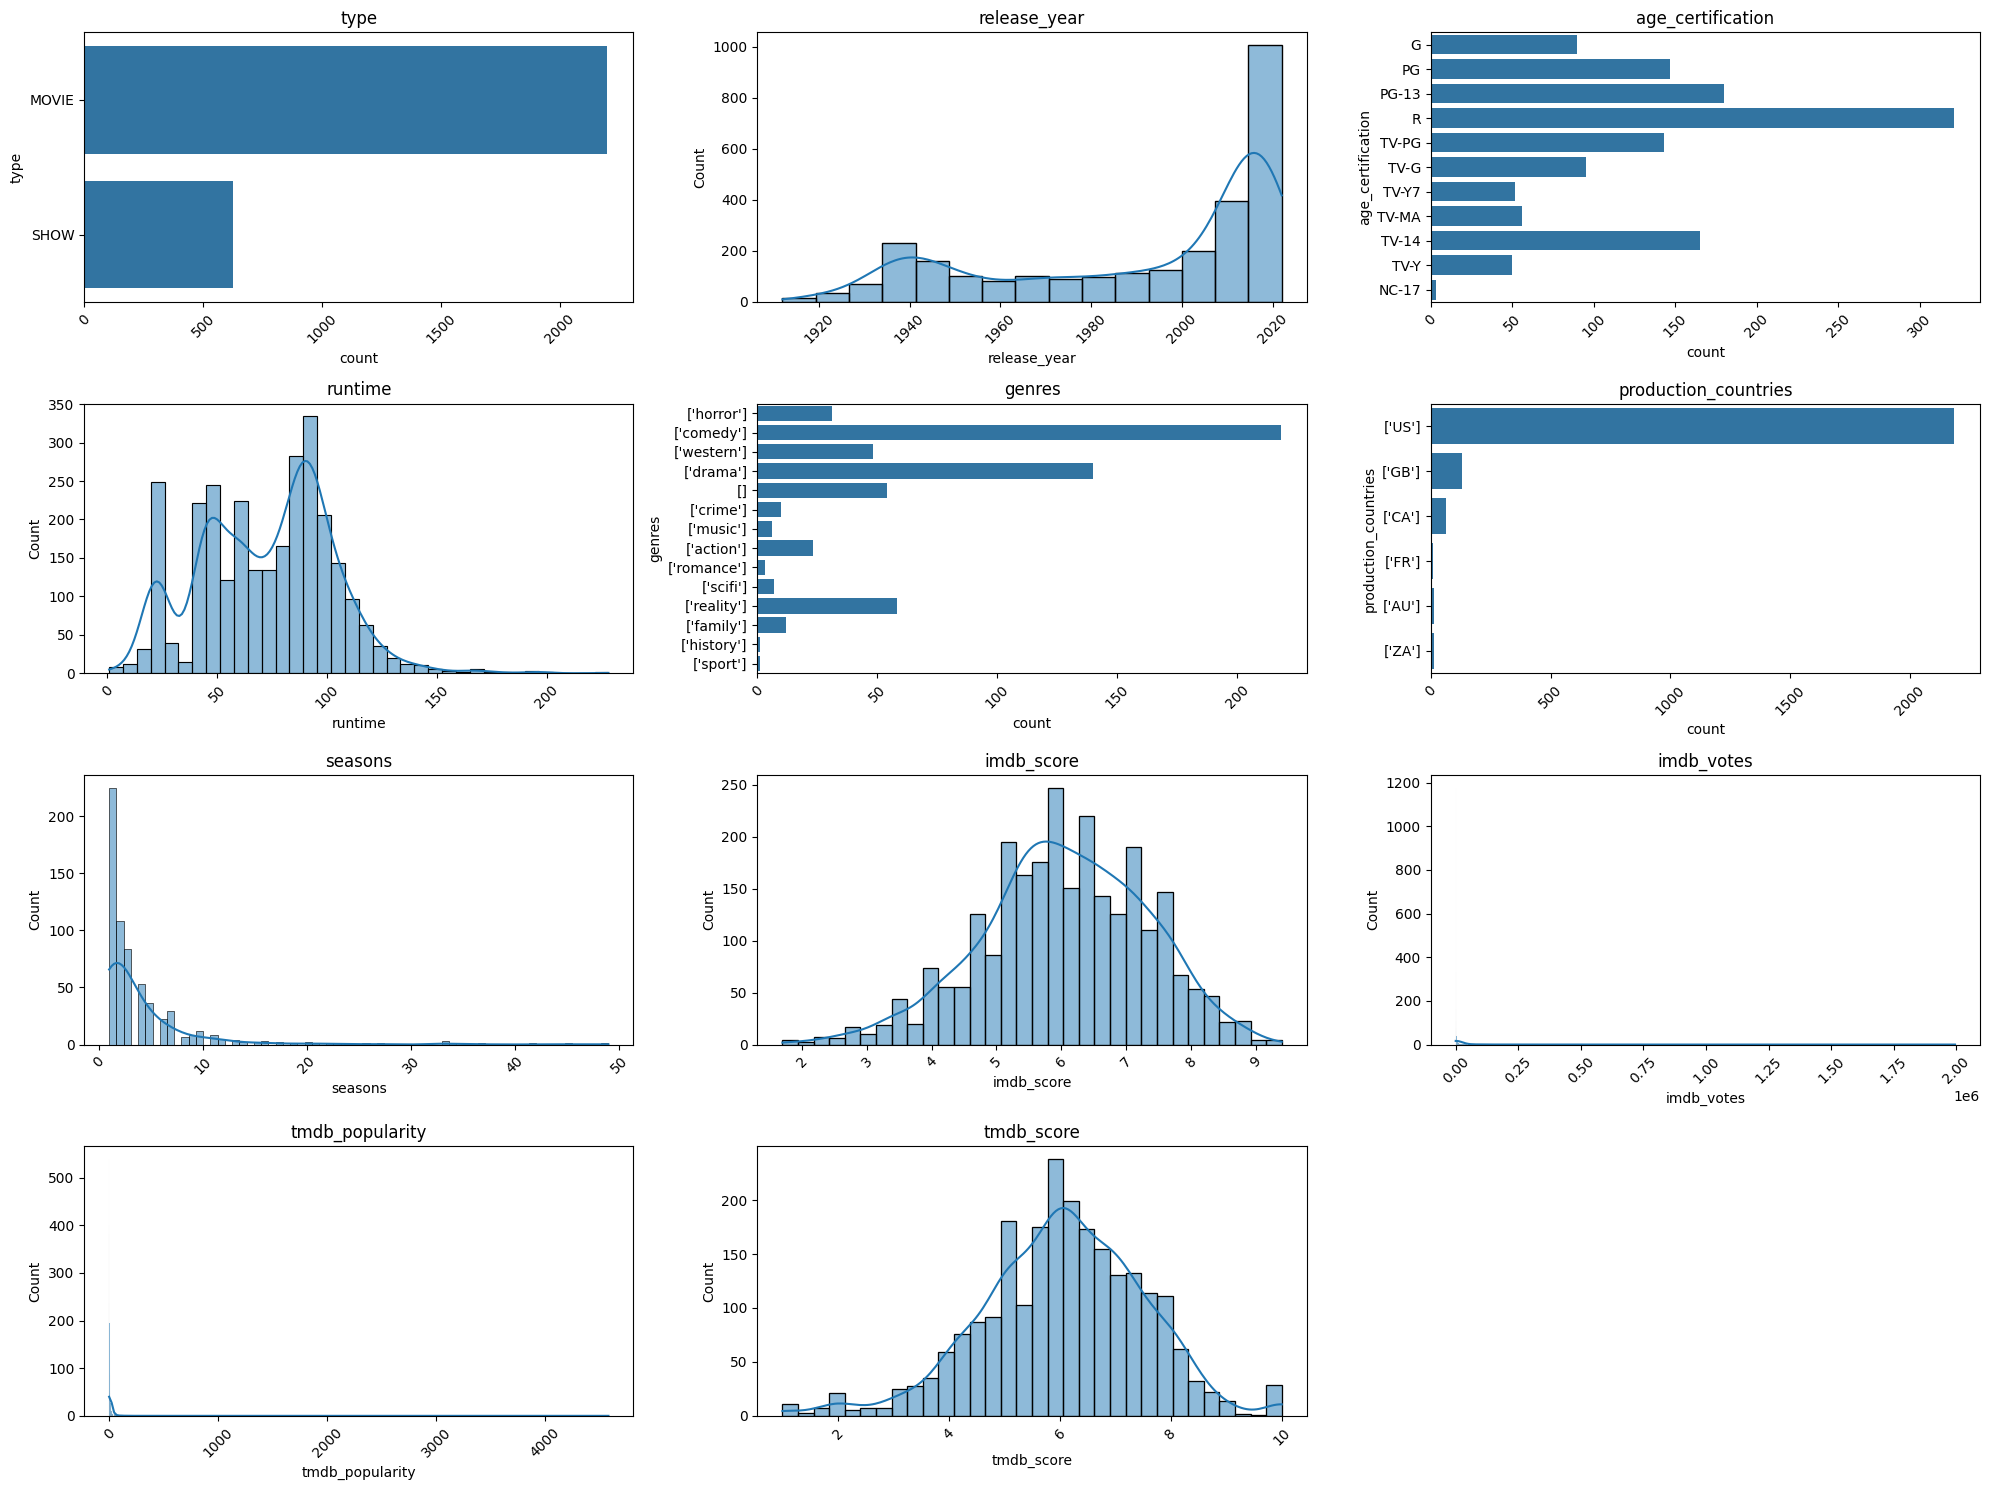

In [162]:

def plot_distribution(data_df, cols=5, width=20, height=15):
    # Crear una figura con el tamaño definido por los parámetros width y height
    fig = plt.figure(figsize=(width, height))

    # Calcular el número de filas necesarias para acomodar todas las columnas en la gráfica
    rows = math.ceil((data_df.shape[1] - 3) / cols)  # Excluye tres columnas (title, imdb_id, description)

    # Contador para los subplots
    plot_index = 1

    # Iterar sobre cada columna en el dataset, excepto alguna
    for column in data_df.columns:
        if column in ['title', 'imdb_id', 'description','id']:
            continue  # Omitir las columnas especificadas

        # Crear subplots, añadiendo cada uno en su posición dentro de la cuadrícula de filas y columnas
        ax = fig.add_subplot(rows, cols, plot_index)
        plot_index += 1

        # Establecer el título de cada subplot como el nombre de la columna actual
        ax.set_title(column)

        # Filtrar valores específicos para 'production_countries'
        if column == 'production_countries':
            filtered_df = data_df[data_df['production_countries'].isin(["['US']", "['GB']", "['FR']", "['SP']", "['CA']", "['ZA']", "['AU']"])]
            sns.countplot(data=filtered_df, y=column, ax=ax)
            plt.xticks(rotation=45)
        elif column == 'genres':
            # Filtrar géneros con longitud de caracteres menor a 12
            filtered_df = data_df[data_df['genres'].apply(lambda x: len(str(x)) < 12)]
            sns.countplot(data=filtered_df, y=column, ax=ax)
            plt.xticks(rotation=45)
        elif data_df.dtypes[column] == object:
            # Usar un gráfico de barras (countplot) para columnas categóricas
            sns.countplot(data=data_df, y=column, ax=ax)
            plt.xticks(rotation=45)
        else:
            # Usar un histograma con KDE para columnas numéricas
            sns.histplot(data_df[column], ax=ax, kde=True)
            plt.xticks(rotation=45)

    # Ajustar el layout de la figura para evitar solapamientos entre subplots
    plt.tight_layout()

# Llamar a la función con el DataFrame
plot_distribution(df_paramount, cols=3)

### Comparación de temporadas por género en series

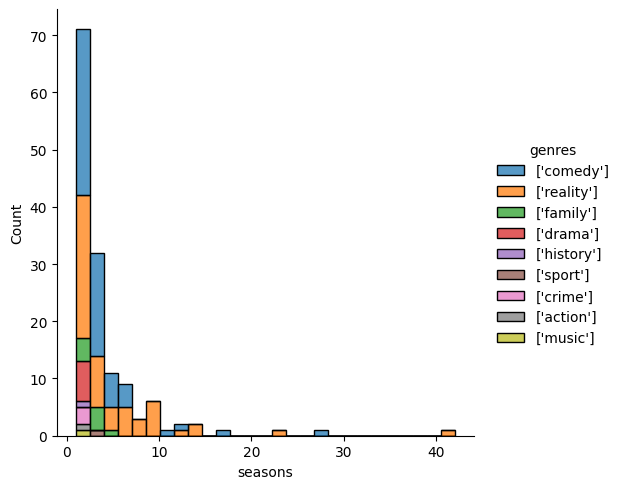

In [163]:
filtroSeries = series[series['genres'].apply(lambda x: len(str(x)) < 12 and len(str(x)) > 3)]
sns.displot(data=filtroSeries,
            x="seasons", #Variable numérica
            hue="genres", #Variable categórica
            #col="genres", #Gráficos por género
            multiple="stack") #Barras apiladas

### Comparación de puntuación de imdb por género

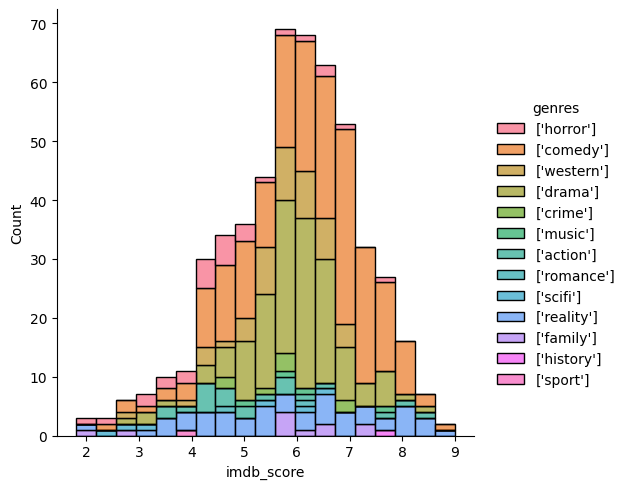

In [164]:
filtroGeneros = df_paramount[df_paramount['genres'].apply(lambda x: len(str(x)) < 12 and len(str(x)) > 3)]
sns.displot(data=filtroGeneros,
            x="imdb_score",
            hue="genres",
            #col="genres",
            multiple="stack")

### Comparación de géneros y edad de calificación con evolución de los años

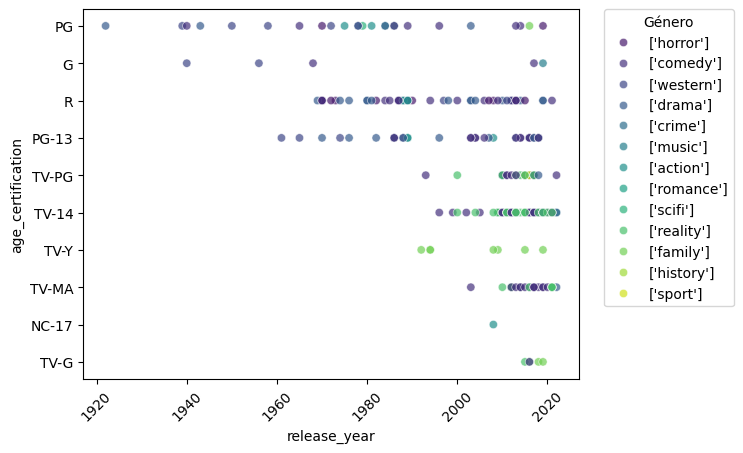

In [165]:
filtroGeneros = df_paramount[df_paramount['genres'].apply(lambda x: len(str(x)) < 12 and len(str(x)) > 3)]
sns.scatterplot(
    data=filtroGeneros,
    x="release_year",        
    y="age_certification",          
    hue="genres",            # Diferenciar por género
    palette="viridis",
    alpha=0.7                # Transparencia para ver puntos superpuestos
)

# Mover la leyenda fuera del gráfico
plt.legend(title="Género", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.xticks(rotation=45)
plt.show()

### Comparación de producciones por país y año

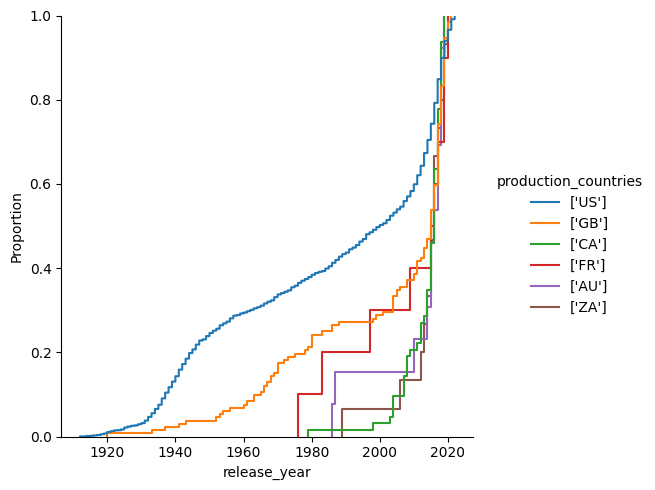

In [8]:
filtroPaises = df_paramount[df_paramount['production_countries'].isin(["['US']", "['GB']", "['FR']", "['CA']", "['ZA']", "['AU']"])]

sns.displot(
    data=filtroPaises,
    x="release_year",
    hue="production_countries",
    #col="production_countries",  # Gráficos por país
    kind="ecdf",                 
    facet_kws={'sharey': False}, # Permitir diferentes escalas en cada gráfico
)

### Comparación de puntuación de imdb por paises

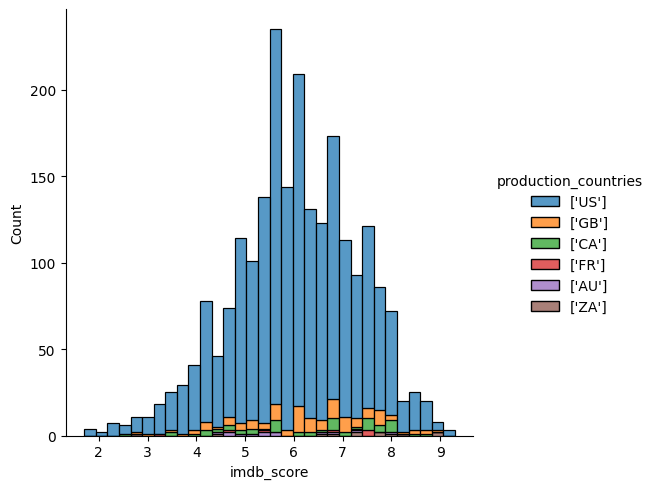

In [ ]:
sns.displot(data=filtroPaises,
            x="imdb_score",
            hue="production_countries",
            multiple="stack")


### ¿Existe relación entre los votos de imdb y la calificación de imdb?

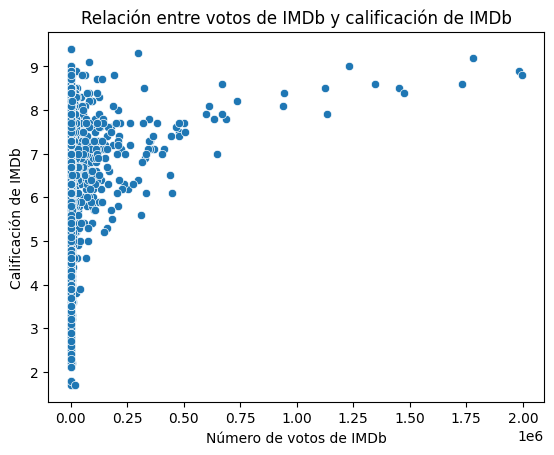

In [39]:
sns.scatterplot(data=df_paramount, x='imdb_votes', y='imdb_score')

# Personaliza la gráfica
plt.title('Relación entre votos de IMDb y calificación de IMDb')
plt.xlabel('Número de votos de IMDb')
plt.ylabel('Calificación de IMDb')

# Muestra la gráfica
plt.show()

### Diferencias entre puntuaciones de IMDB y TMDB

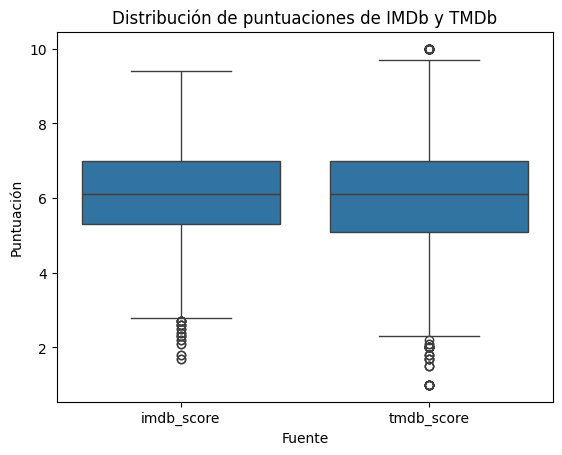

In [40]:
# Reshape de los datos para usar seaborn con un solo eje categórico
df_melted = df_paramount[['imdb_score', 'tmdb_score']].melt(var_name='Fuente', value_name='Puntuación')

# Gráfico de caja para comparar las puntuaciones
sns.boxplot(data=df_melted, x='Fuente', y='Puntuación')

# Personaliza la gráfica
plt.title('Distribución de puntuaciones de IMDb y TMDb')
plt.xlabel('Fuente')
plt.ylabel('Puntuación')

# Muestra la gráfica
plt.show()

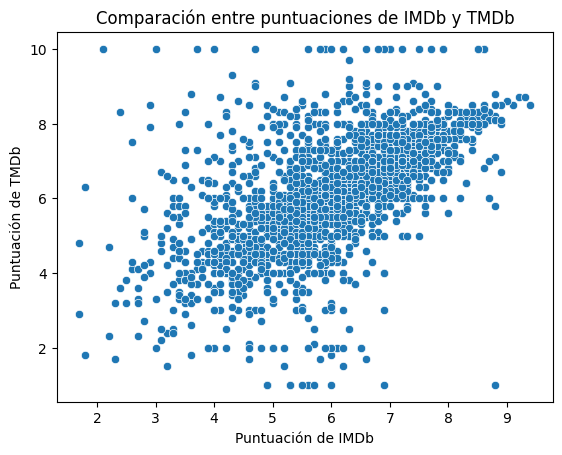

In [41]:
sns.scatterplot(data=df_paramount, x='imdb_score', y='tmdb_score')

# Personaliza la gráfica
plt.title('Comparación entre puntuaciones de IMDb y TMDb')
plt.xlabel('Puntuación de IMDb')
plt.ylabel('Puntuación de TMDb')

# Muestra la gráfica
plt.show()

### Comparación de géneros por paises

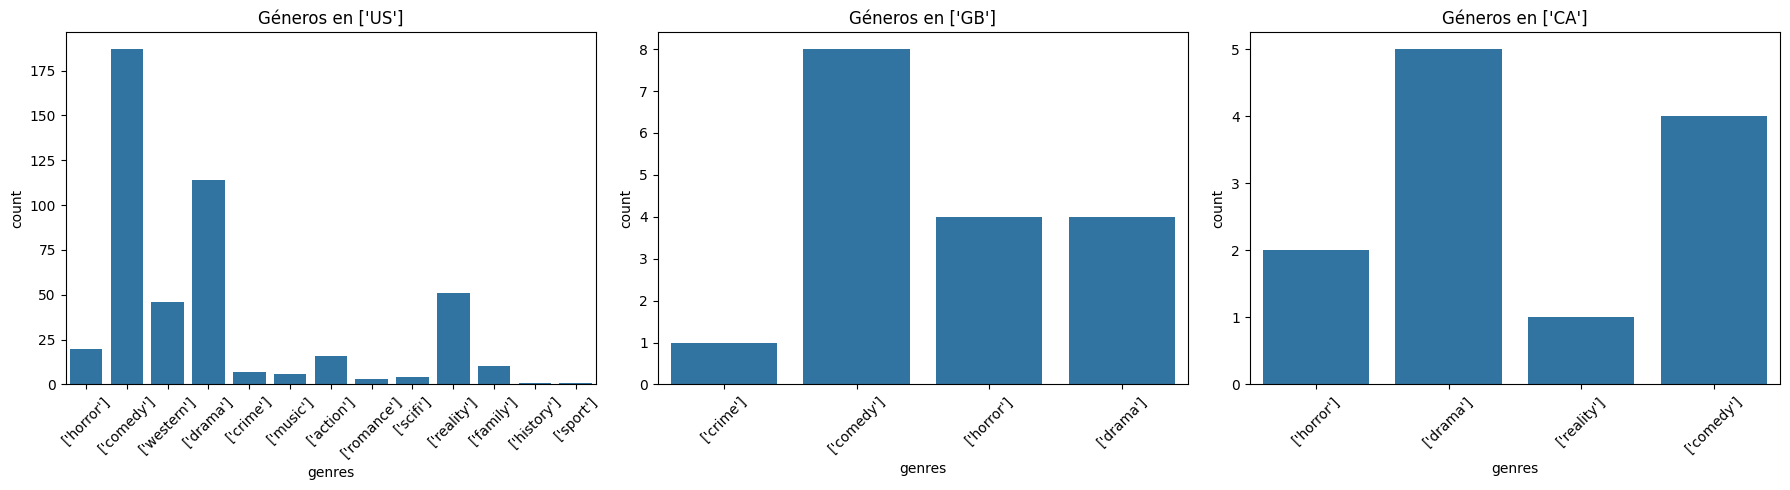

In [167]:
def graficar_generos_por_pais(df, paises):
    # Crear figura con una sola fila de subplots
    fig, axes = plt.subplots(1, len(paises), figsize=(6 * len(paises), 5))

    for i, pais in enumerate(paises):
        # Filtrar el DataFrame por el país actual y la longitud de los géneros
        df_pais = df[
            (df['production_countries'] == pais) &
            (df['genres'].apply(lambda x: 3 < len(str(x)) < 12))
        ]
        
        # Crear gráfico solo si hay datos
        if not df_pais.empty:
            sns.countplot(data=df_pais, x="genres", ax=axes[i])
            axes[i].set_title(f"Géneros en {pais}")
            axes[i].tick_params(axis='x', rotation=45)
        else:
            axes[i].text(0.5, 0.5, "Sin datos", ha='center')

    plt.tight_layout()
    plt.show()

# Lista de países a filtrar
paises_filtrados = ["['US']", "['GB']", "['CA']"]

# Llamada a la función
graficar_generos_por_pais(df_paramount, paises_filtrados)

### Mapa de calor de producciones de todos los países

In [168]:
# Limpiar la columna 'production_countries' (solo si la columna existe)
if 'production_countries' in df_paramount.columns:
    df_paramount['production_countries'] = df_paramount['production_countries'].apply(
        lambda x: re.findall(r"'(\w+)'", x) if isinstance(x, str) else []
    )

# Filtrar filas con países no vacíos
df_paramount = df_paramount[df_paramount['production_countries'].str.len() > 0]

# Expandir cada país a una nueva fila
df_paramount = df_paramount.explode('production_countries')

# Inicializar geolocalizador y limitador de velocidad
geolocator = Nominatim(user_agent="geoapi")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Crear un diccionario para guardar coordenadas
country_coords = {}

# Obtener coordenadas para cada código de país único
for country_code in df_paramount['production_countries'].unique():
    location = geocode(country_code)
    if location:
        country_coords[country_code] = (location.latitude, location.longitude)

# Agregar una columna de coordenadas al DataFrame
df_paramount['coords'] = df_paramount['production_countries'].map(country_coords)

# Agrupar producciones por coordenadas (sin años)
heat_data = df_paramount.groupby('coords').size().reset_index(name='productions')

# Crear el mapa base
mapa = folium.Map(location=[20, 0], zoom_start=2)

# Preparar los datos para el HeatMap
heatmap_data = [
    [row['coords'][0], row['coords'][1], row['productions']] 
    for idx, row in heat_data.iterrows()
]

# Añadir el mapa de calor
HeatMap(heatmap_data).add_to(mapa)

# Guardar y mostrar el mapa
mapa.save("heatmap_productions.html")
mapa

### Créditos de las producciones

In [38]:
df_creditos = pd.read_csv("credits.csv")
df_paramountCreditos = pd.merge(df_paramount, df_creditos, on='id', how='inner')
df_paramountCreditos.head(3)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,21174,Buster Keaton,Johnny Gray,ACTOR
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,28713,Marion Mack,Annabelle Lee,ACTOR
2,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,28714,Glen Cavender,Captain Anderson,ACTOR


### Comparación de actores por país y año

<Figure size 1400x800 with 0 Axes>

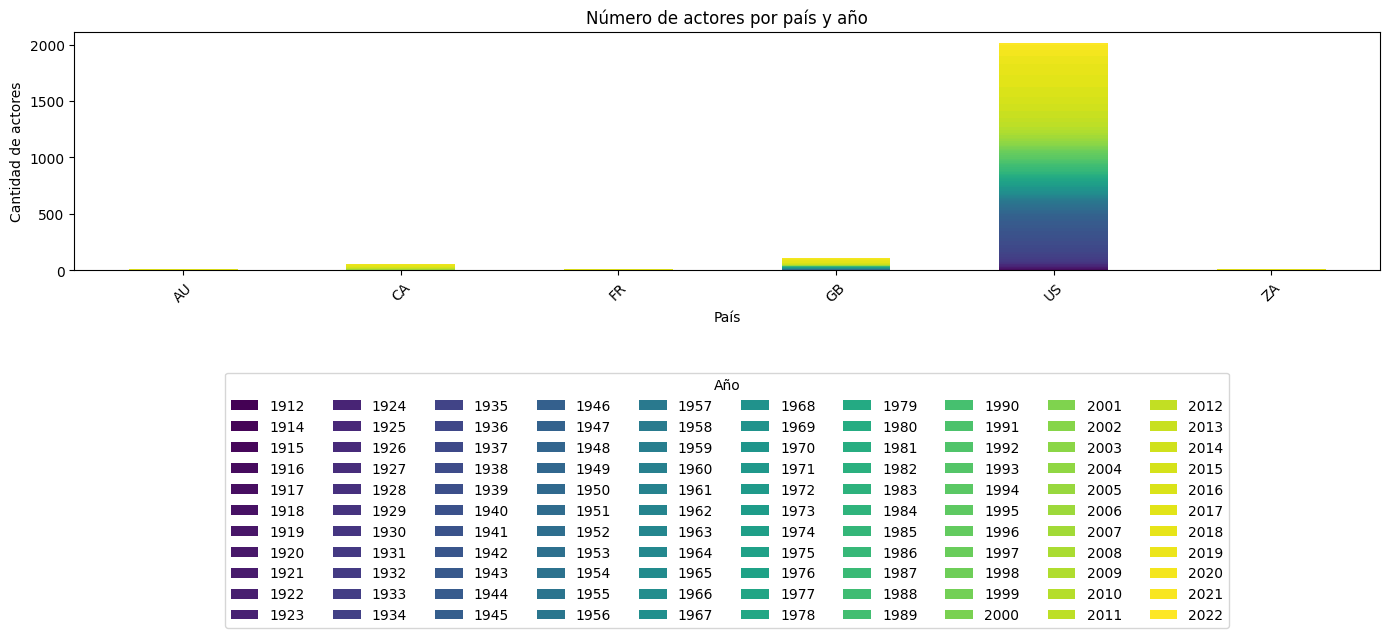

In [36]:
# Filtrar países específicos y limpiar el formato en la columna 'production_countries'
df_filtrado = df_paramountCreditos[df_paramountCreditos['production_countries'].isin(["['US']", "['GB']", "['FR']", "['CA']", "['ZA']", "['AU']"])]
df_filtrado.loc[:, 'production_countries'] = df_filtrado['production_countries'].str.replace(r"[\'\[\]]", "", regex=True)

# Eliminar duplicados para que no se cuente varias veces el mismo país por película
df_unique = df_filtrado.drop_duplicates(subset=['id', 'production_countries'])

# Contar el número de actores por país y año
actoresPaisYear = df_unique.groupby(['production_countries', 'release_year']).size().unstack(fill_value=0)

# Graficar los resultados
plt.figure(figsize=(14, 8))
actoresPaisYear.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 8))
plt.title('Número de actores por país y año')
plt.xlabel('País')
plt.ylabel('Cantidad de actores')
plt.xticks(rotation=45)
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
# Configurar la leyenda en la parte inferior en orientación horizontal
plt.legend(title='Año', bbox_to_anchor=(0.5, -0.4), loc='upper center', ncol=10, fancybox=True)
plt.tight_layout()  # Ajusta el espacio para que no se sobrepongan elementos
plt.show()

### Comparación de actores por género

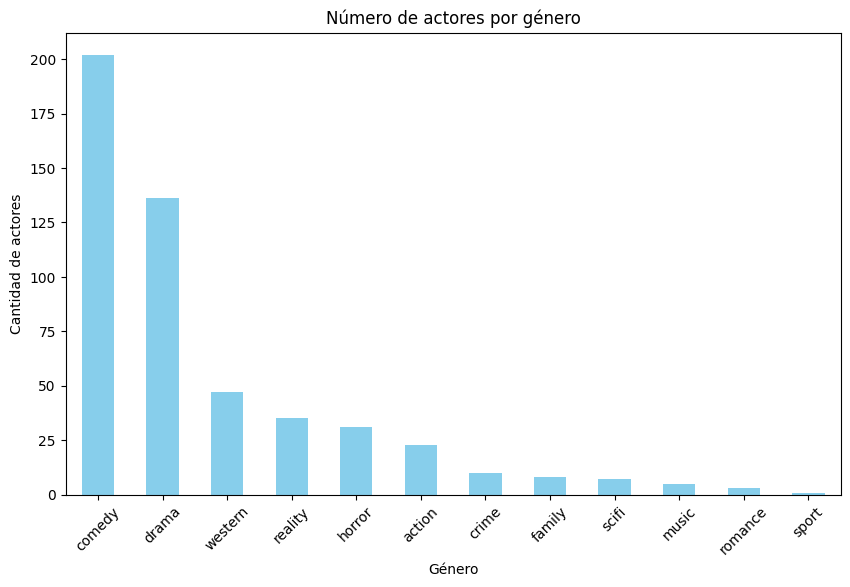

In [23]:
# Filtrar géneros con más de 3 y menos de 12 caracteres y limpiar los nombres
df_filtrado = df_paramountCreditos[df_paramountCreditos['genres'].str.len().between(4, 11)].copy()
df_filtrado.loc[:, 'genres'] = df_filtrado['genres'].str.replace(r"[\'\[\]]", "", regex=True)

# Eliminamos duplicados para que no se cuente varias veces el mismo género por película
df_unique = df_filtrado.drop_duplicates(subset=['id', 'genres'])

# Contamos el número de actores por género
actor_count_by_genre = df_unique['genres'].value_counts()

# Graficamos los resultados
plt.figure(figsize=(10, 6))
actor_count_by_genre.plot(kind='bar', color='skyblue')
plt.title('Número de actores por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de actores')
plt.xticks(rotation=45)
plt.show()